In [39]:
import sys
import string
import os
import numpy as np
from math import pi
import scipy.stats

import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

  0%|          | 0/1 [00:00<?, ?it/s]

DNA
(array([  0,   0,   0,   0,   0,   0,   0,  14,  14,   9,   7,   8,   8,
        19,  15,  25,  33,  21,  32,  37,  25,  55,  59,  50,  37,  54,
        38,  42,  61,  77,  90, 101, 131, 108, 124, 101, 105,  90,  77,
        89, 108, 106, 127, 209, 374, 643, 489, 178,  10,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0]), array([  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100, 105, 110, 115, 120, 125,
       130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
       195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255,
       260, 265, 270, 275, 280, 285, 290

/home/yagafarova/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


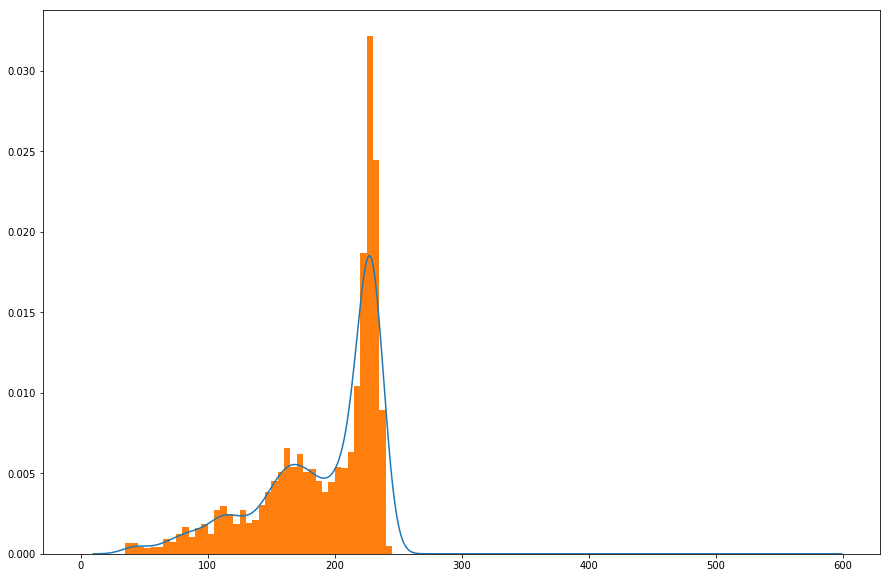

In [64]:

#Указываем: шаг по фреймам, максимальное количество фрейм (как автоматизировать?)

step = 1
max_frame = 9045

# In[34]:

for elem in (['DNA']):
    print(elem)
    if not os.path.exists(f'dsDNA_4000bp_50mM/{elem}_rad_distr'):
        os.mkdir(f'dsDNA_4000bp_50mM/{elem}_rad_distr')
    for frame in tqdm(range(6180, 6181, step)):
        #Считываем координаты всех частиц
        fname = f'dsDNA_4000bp_50mM/distr/{elem}.{frame}.dat'
        fig = plt.figure(figsize = (15,10))
        #Вычисляем радиальное распределение
        x = np.arange(10,600)
        data = np.array([float(i.strip()) for i in open(fname)])
        # Посторой гистограммы hist(data, bins=[1, 2, 3, 4])  и сравни с графиком (x, pdf)
        s = np.histogram(data, bins = range(0,600,5))
        pdf = np.array(scipy.stats.gaussian_kde(data).pdf(x))
        pdf1 = np.array(scipy.stats.gaussian_kde(data, bw_method='scott').pdf(x))
        pdf2 = np.array(scipy.stats.gaussian_kde(data, bw_method=0.2).pdf(x))
        denom = x*x*4*pi
        pltdt = np.divide(pdf, denom)
        pltdt /= sum(pltdt)
        pltdt1 = np.divide(pdf1, denom)
        pltdt1 /= sum(pltdt1)
        pltdt2 = np.divide(pdf2, denom)
        pltdt2 /= sum(pltdt2)
        h = s[0]/(s[1][:-1]**2)
        print(s)
        plt.plot(x, pdf)
#         plt.plot(x, pltdt1)
#         plt.plot(x, pltdt2)
#         plt.plot(s[1][:-1], h)
        plt.hist(data, bins = range(0,600,5), density=True)

        #Сохраняем то, что посчитали
#         file = open(f'dsDNA_4000bp_50mM/{elem}_rad_distr/{frame}.dat', "w")
#         for i,j in enumerate(x):
#             file.write(str(j) + '\t' + str(pltdt[i]) + '\n')
#         file.close()
#     plt.show()
